<a href="https://colab.research.google.com/github/ivonnics/Machine-Learning/blob/master/CREDITCARD_Analysis_II_con_Feature_reduction%2C_CONFUSSION_MATRIX_EXPLAINED_and_Loading_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# main libraries
import pandas as pd
import numpy as np
import time
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Tomado de: https://towardsdatascience.com/data-pre-processing-techniques-you-should-know-8954662716d6

In [2]:
# Read the data in the CSV file using pandas
df = pd.read_csv('https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().any().sum()

0

In [4]:
All = df.shape[0]
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('# of frauds :',len(fraud),'(',x*100,'%)')
print('# of non frauds :',len(nonFraud),'(',y*100,'%)')

# of frauds : 492 ( 0.1727485630620034 %)
# of non frauds : 284315 ( 99.82725143693798 %)


Text(0, 0.5, 'Frequency')

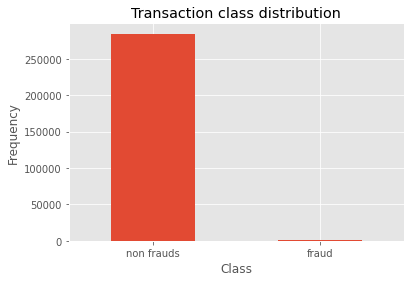

In [5]:
# Let's plot the Transaction class against the Frequency
labels = ['non frauds','fraud']
classes = pd.value_counts(df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")


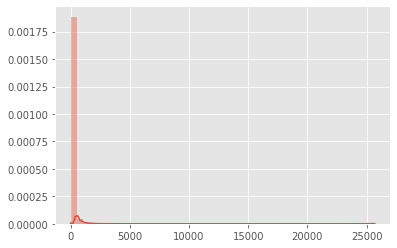

In [6]:
# distribution of Amount
amount = [df['Amount'].values]
sns.distplot(amount)

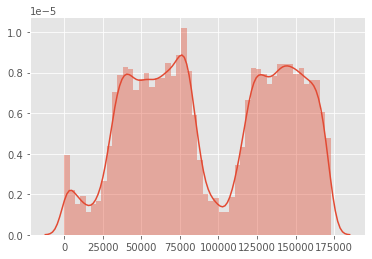

In [7]:
# distribution of Time
time = df['Time'].values
sns.distplot(time)

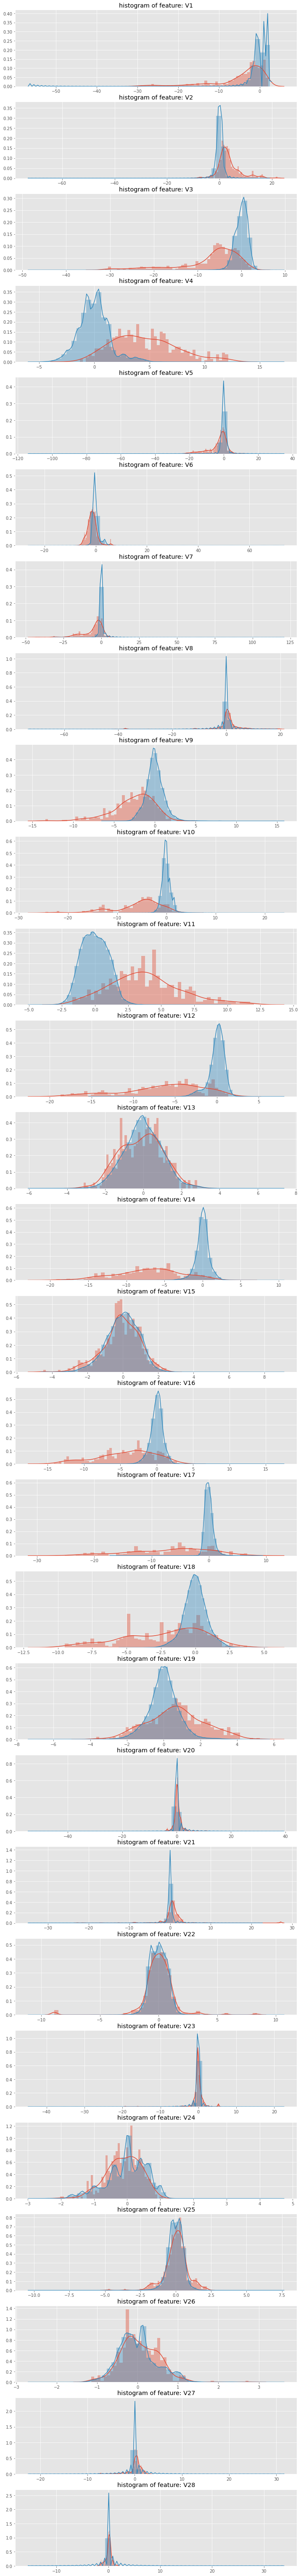

In [8]:
# distribution of anomalous features
import matplotlib.gridspec as gridspec
anomalous_features = df.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

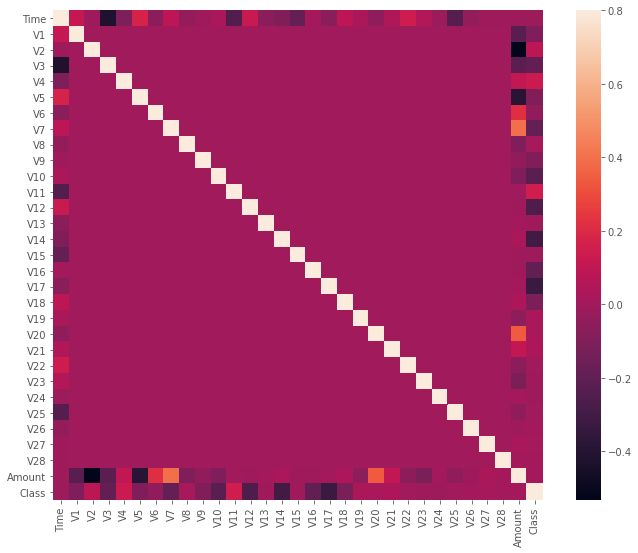

In [9]:
# heat map of correlation of features
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [10]:
# Standardizing the features
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)
print(df.shape)
df.head()

(284807, 31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [0]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Train model

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.05,
                                                    random_state=42)

clf_4 = RandomForestClassifier()
clf_4.fit(X_train, y_train)
 
# Predict on training set
pred_y_4 = clf_4.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_4) )
# 0.9744
 


[0 1]
0.9995786812723826


In [14]:
# What about AUROC?
from sklearn.metrics import roc_auc_score

prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y, prob_y_4) )
# 0.999078798186

0.9979402855157933


In [15]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=pred_y_4)
print(confmat)

[[14215     1]
 [    5    20]]


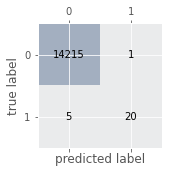

In [16]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

In [17]:
TP = confmat[0,0]
FP = confmat[0,1]
TN = confmat[1,0]
FN = confmat[1,1]
TP,FP,TN,FN

(14215, 1, 5, 20)

From: https://towardsdatascience.com/the-2-step-guide-to-upload-images-in-google-colab-b51348e882e4

and

https://stackoverflow.com/questions/61704041/how-may-i-insert-an-image-from-my-github-repository-in-my-google-colab-notebook/61708045#61708045

and

https://www.geeksforgeeks.org/working-images-python/

## De mi Google Drive:
![picture](https://drive.google.com/uc?id=10ag5oyoi5wbdXbYFE50XsWgG3VJhV16q)

## De mi Github:
![](https://raw.githubusercontent.com/ivonnics/Machine-Learning/master/Tabla%20Confussion%20Matrix.png)

![](https://raw.githubusercontent.com/ivonnics/Machine-Learning/master/St_benedict_medal-2006_04_24.png)

## Cargando archivos directamente de donde sea:
al directorio de trabajo de Google Colab...

In [18]:
 !wget https://raw.githubusercontent.com/ivonnics/Machine-Learning/master/St_benedict_medal-2006_04_24.png

--2020-05-10 15:37:23--  https://raw.githubusercontent.com/ivonnics/Machine-Learning/master/St_benedict_medal-2006_04_24.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36351 (35K) [image/png]
Saving to: ‘St_benedict_medal-2006_04_24.png.1’

St_benedict_medal-2 100%[===================>]  35.50K  --.-KB/s    in 0.01s   

2020-05-10 15:37:24 (2.44 MB/s) - ‘St_benedict_medal-2006_04_24.png.1’ saved [36351/36351]



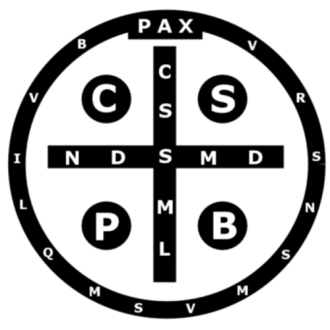

In [19]:
from PIL import Image 
img  = Image.open('St_benedict_medal-2006_04_24.png')
img  

In [20]:
 !wget https://raw.githubusercontent.com/ivonnics/Machine-Learning/master/Graficando%20Figure_1.png

--2020-05-10 15:37:25--  https://raw.githubusercontent.com/ivonnics/Machine-Learning/master/Graficando%20Figure_1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35388 (35K) [image/png]
Saving to: ‘Graficando Figure_1.png.1’

Graficando Figure_1 100%[===================>]  34.56K  --.-KB/s    in 0.02s   

2020-05-10 15:37:26 (2.24 MB/s) - ‘Graficando Figure_1.png.1’ saved [35388/35388]



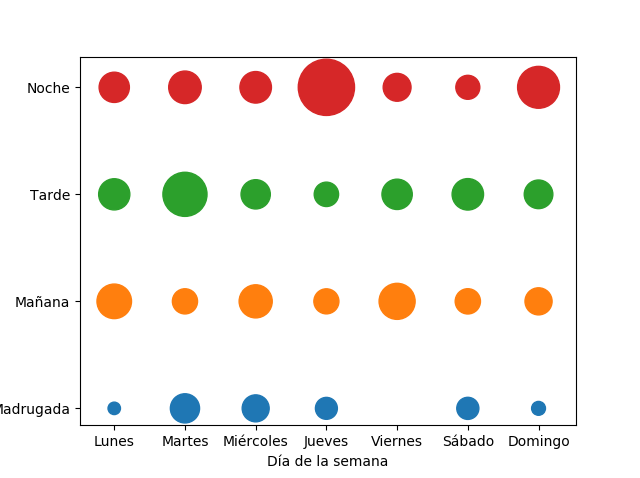

In [21]:
from PIL import Image 
img  = Image.open('Graficando Figure_1.png')
img  

In [22]:
Accuracy=(TP+FN)/(TP+FP+TN+FN)
Precision=TP/(TP+FP)
NPV=FN/(TN+FN)
Sensitivity=TP/(TP+TN)
Specificity=FN/(FP+FN)
print('Accuracy =',Accuracy)
print('Precision =',Precision)
print('NPV (or Precision for Negative values) =',NPV)
print('Recall or Sensitivity =',Sensitivity)
print('Specificity (or Recall for negative examples)=',Specificity)

Accuracy = 0.9995786812723826
Precision = 0.9999296567248172
NPV (or Precision for Negative values) = 0.8
Recall or Sensitivity = 0.999648382559775
Specificity (or Recall for negative examples)= 0.9523809523809523


In [23]:
y_true=y_test
y_pred=pred_y_4
from sklearn.metrics import classification_report
target_names = ['Non Frauds', 'Frauds']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Non Frauds       1.00      1.00      1.00     14216
      Frauds       0.95      0.80      0.87        25

    accuracy                           1.00     14241
   macro avg       0.98      0.90      0.93     14241
weighted avg       1.00      1.00      1.00     14241



## Embedded Method:

In [24]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
coef

Best alpha using built-in LassoCV: 0.001397
Best score using built-in LassoCV: 0.503567


V1        -0.001785
V2         0.001783
V3        -0.004677
V4         0.003217
V5        -0.002124
V6        -0.000573
V7        -0.005373
V8         0.000000
V9        -0.002537
V10       -0.007093
V11        0.004960
V12       -0.009431
V13       -0.000000
V14       -0.011586
V15       -0.000000
V16       -0.007495
V17       -0.014026
V18       -0.003535
V19        0.000000
V20        0.000000
V21        0.000000
V22        0.000000
V23       -0.000000
V24       -0.000000
V25        0.000000
V26        0.000000
V27        0.000000
V28        0.000000
Vamount    0.000000
Vtime     -0.000000
dtype: float64

In [25]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 15 variables and eliminated the other 15 variables


In [26]:
Selvar= coef.loc[(coef!=0)]
print(Selvar)
Newfeat=list(Selvar.index)
Newfeat

V1    -0.001785
V2     0.001783
V3    -0.004677
V4     0.003217
V5    -0.002124
V6    -0.000573
V7    -0.005373
V9    -0.002537
V10   -0.007093
V11    0.004960
V12   -0.009431
V14   -0.011586
V16   -0.007495
V17   -0.014026
V18   -0.003535
dtype: float64


['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18']

Text(0.5, 1.0, 'Feature importance using Lasso Model')

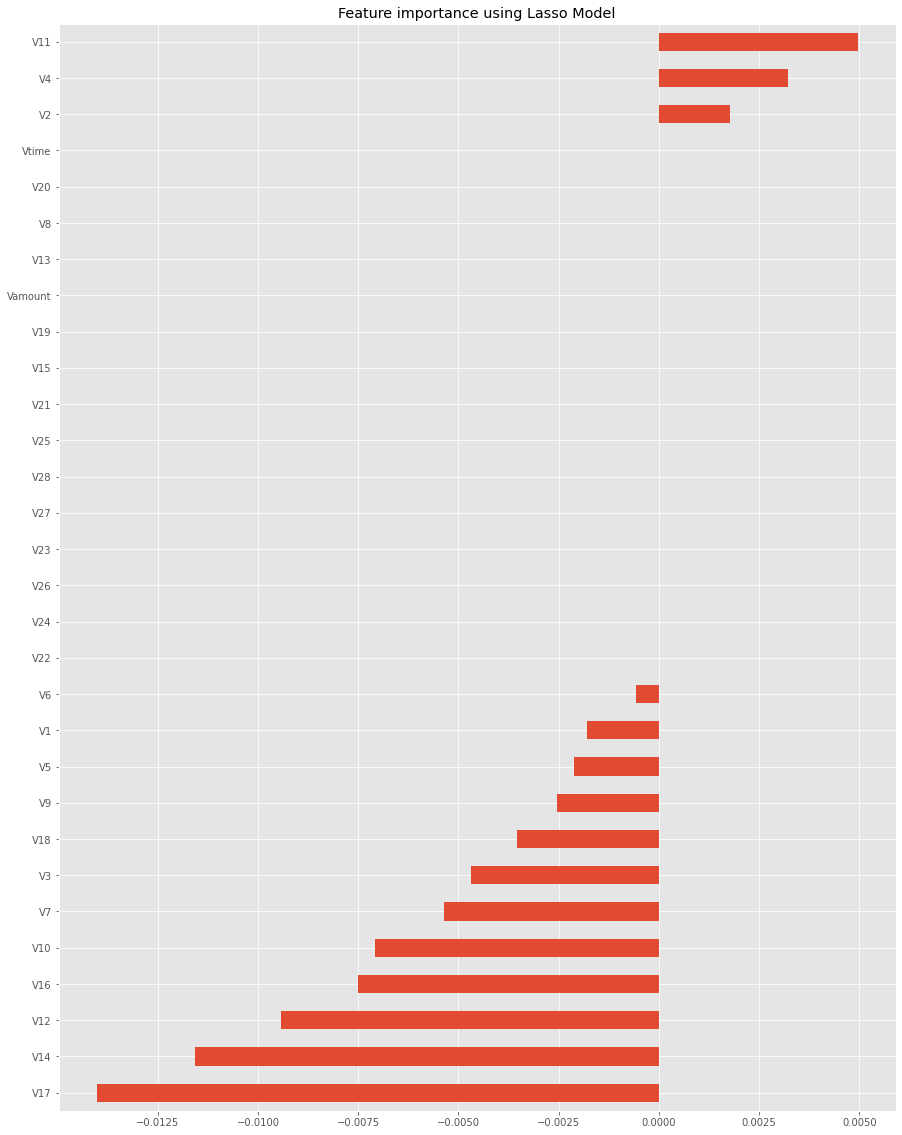

In [27]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [28]:
# From: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
titanic=df[Newfeat]
titanic

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981


In [29]:
# Train model

X_train2, X_test2, y_train2, y_test2 = train_test_split(titanic, y, stratify=y,test_size=0.05,
                                                    random_state=42)

clf_4 = RandomForestClassifier()
clf_4.fit(X_train2, y_train2)
 
# Predict on training set
pred_y_5 = clf_4.predict(X_test2)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test2, pred_y_5) )
# 0.9744
 


[0 1]
0.999719120848255


In [30]:
confmat2 = confusion_matrix(y_true=y_test2, y_pred=pred_y_5)
print(confmat2)

[[14215     1]
 [    3    22]]


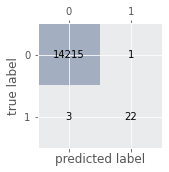

In [31]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat2.shape[1]):
        ax.text(x=j, y=i, s=confmat2[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

In [32]:
TP2 = confmat2[0,0]
FP2 = confmat2[0,1]
TN2 = confmat2[1,0]
FN2 = confmat2[1,1]
TP2,FP2,TN2,FN2

(14215, 1, 3, 22)

In [33]:
Accuracy=(TP2+FN2)/(TP2+FP2+TN2+FN2)
Precision=TP2/(TP2+FP2)
NPV=FN2/(TN2+FN2)
Sensitivity=TP2/(TP2+TN2)
Specificity=FN2/(FP2+FN2)
print('Accuracy =',Accuracy)
print('Precision =',Precision)
print('NPV (or Precision for Negative values) =',NPV)
print('Recall or Sensitivity =',Sensitivity)
print('Specificity (or Recall for negative examples)=',Specificity)

Accuracy = 0.999719120848255
Precision = 0.9999296567248172
NPV (or Precision for Negative values) = 0.88
Recall or Sensitivity = 0.9997889998593332
Specificity (or Recall for negative examples)= 0.9565217391304348


In [34]:
y_true=y_test2
y_pred=pred_y_5
from sklearn.metrics import classification_report
target_names = ['Non Frauds', 'Frauds']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Non Frauds       1.00      1.00      1.00     14216
      Frauds       0.96      0.88      0.92        25

    accuracy                           1.00     14241
   macro avg       0.98      0.94      0.96     14241
weighted avg       1.00      1.00      1.00     14241



## RFE (Recursive Feature Elimination):

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,len(df.columns))            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 30
Score with 30 features: 0.517961


In [36]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, nof)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [37]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, nof)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Vamount', 'Vtime'],
      dtype='object')
